## Imports

In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import cv2

from skimage.io import imread

## Retrieving the dataset from Kaggle

In [3]:
!pip install -q kaggle

In [4]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"osama1orabi","key":"3eec301fd02f1e0626905c382ec77fd1"}'}

In [5]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d weisinx7/stamps-dataset

 81% 18.0M/22.1M [00:00<00:00, 59.6MB/s]
100% 22.1M/22.1M [00:00<00:00, 71.5MB/s]


In [8]:
!mkdir stamps-dataset
!unzip stamps-dataset.zip -d stamps-dataset

Archive:  stamps-dataset.zip
  inflating: stamps-dataset/101a_0.bmp  
  inflating: stamps-dataset/101b_5.bmp  
  inflating: stamps-dataset/101c_10.bmp  
  inflating: stamps-dataset/101d_15.bmp  
  inflating: stamps-dataset/101e_20.bmp  
  inflating: stamps-dataset/101f_25.bmp  
  inflating: stamps-dataset/101g_30.bmp  
  inflating: stamps-dataset/101h_35.bmp  
  inflating: stamps-dataset/101i_40.bmp  
  inflating: stamps-dataset/103a_0.bmp  
  inflating: stamps-dataset/103b_5.bmp  
  inflating: stamps-dataset/103c_10.bmp  
  inflating: stamps-dataset/103d_15.bmp  
  inflating: stamps-dataset/103e_20.bmp  
  inflating: stamps-dataset/103f_25.bmp  
  inflating: stamps-dataset/103g_30.bmp  
  inflating: stamps-dataset/103h_35.bmp  
  inflating: stamps-dataset/103i_40.bmp  
  inflating: stamps-dataset/104a_0.bmp  
  inflating: stamps-dataset/104b_5.bmp  
  inflating: stamps-dataset/104c_10.bmp  
  inflating: stamps-dataset/104d_15.bmp  
  inflating: stamps-dataset/104e_20.bmp  
  inflating

## Cleaning the dataset

In [1]:
import glob

In [2]:
!ls /content/stamps-dataset/

101a_0.bmp   123i_40.bmp  149h_35.bmp  29g_30.bmp  54f_25.bmp  78e_20.bmp
101b_5.bmp   124a_0.bmp   149i_40.bmp  29h_35.bmp  54g_30.bmp  78f_25.bmp
101c_10.bmp  124b_5.bmp   14a_0.bmp    29i_40.bmp  54h_35.bmp  78g_30.bmp
101d_15.bmp  124c_10.bmp  14b_5.bmp    2a_0.bmp    54i_40.bmp  78h_35.bmp
101e_20.bmp  124d_15.bmp  14c_10.bmp   2b_5.bmp    58a_0.bmp   78i_40.bmp
101f_25.bmp  124e_20.bmp  14d_15.bmp   2c_10.bmp   58b_5.bmp   79a_0.bmp
101g_30.bmp  124f_25.bmp  14e_20.bmp   2d_15.bmp   58c_10.bmp  79b_5.bmp
101h_35.bmp  124g_30.bmp  14f_25.bmp   2e_20.bmp   58d_15.bmp  79c_10.bmp
101i_40.bmp  124h_35.bmp  14g_30.bmp   2f_25.bmp   58e_20.bmp  79d_15.bmp
103a_0.bmp   124i_40.bmp  14h_35.bmp   2g_30.bmp   58f_25.bmp  79e_20.bmp
103b_5.bmp   125a_0.bmp   14i_40.bmp   2h_35.bmp   58g_30.bmp  79f_25.bmp
103c_10.bmp  125b_5.bmp   153a_0.bmp   2i_40.bmp   58h_35.bmp  79g_30.bmp
103d_15.bmp  125c_10.bmp  153b_5.bmp   30a_0.bmp   58i_40.bmp  79h_35.bmp
103e_20.bmp  125d_15.bmp  153c_10.bmp  3

In [3]:
SCANS_DIR = "/content/stamps-dataset/"
scan_files = glob.glob(SCANS_DIR + '*.bmp')
scan_files = sorted(scan_files)
len(scan_files)

747

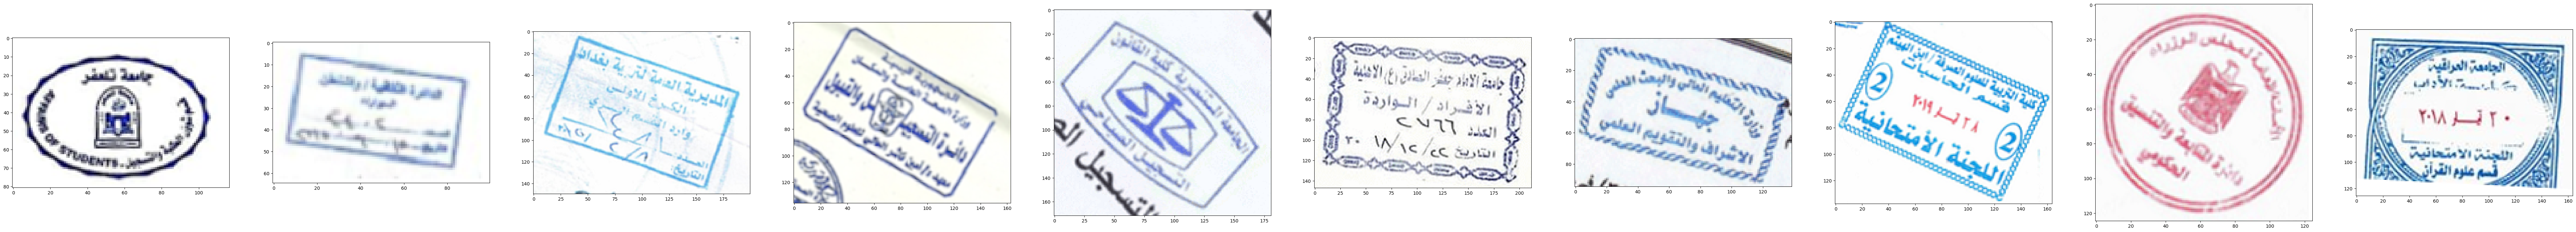

In [7]:
plt.figure(figsize=(100,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(imread(scan_files[i*20]))

In [8]:
scan_files

['/content/stamps-dataset/101a_0.bmp',
 '/content/stamps-dataset/101b_5.bmp',
 '/content/stamps-dataset/101c_10.bmp',
 '/content/stamps-dataset/101d_15.bmp',
 '/content/stamps-dataset/101e_20.bmp',
 '/content/stamps-dataset/101f_25.bmp',
 '/content/stamps-dataset/101g_30.bmp',
 '/content/stamps-dataset/101h_35.bmp',
 '/content/stamps-dataset/101i_40.bmp',
 '/content/stamps-dataset/103a_0.bmp',
 '/content/stamps-dataset/103b_5.bmp',
 '/content/stamps-dataset/103c_10.bmp',
 '/content/stamps-dataset/103d_15.bmp',
 '/content/stamps-dataset/103e_20.bmp',
 '/content/stamps-dataset/103f_25.bmp',
 '/content/stamps-dataset/103g_30.bmp',
 '/content/stamps-dataset/103h_35.bmp',
 '/content/stamps-dataset/103i_40.bmp',
 '/content/stamps-dataset/104a_0.bmp',
 '/content/stamps-dataset/104b_5.bmp',
 '/content/stamps-dataset/104c_10.bmp',
 '/content/stamps-dataset/104d_15.bmp',
 '/content/stamps-dataset/104e_20.bmp',
 '/content/stamps-dataset/104f_25.bmp',
 '/content/stamps-dataset/104g_30.bmp',
 '/con

In [9]:
label_list = [file.split('/')[-1].split('_')[0][:-1] for file in scan_files]
print(label_list)

['101', '101', '101', '101', '101', '101', '101', '101', '101', '103', '103', '103', '103', '103', '103', '103', '103', '103', '104', '104', '104', '104', '104', '104', '104', '104', '104', '105', '105', '105', '105', '105', '105', '105', '105', '105', '106', '106', '106', '106', '106', '106', '106', '106', '106', '107', '107', '107', '107', '107', '107', '107', '107', '107', '111', '111', '111', '111', '111', '111', '111', '111', '111', '112', '112', '112', '112', '112', '112', '112', '112', '112', '113', '113', '113', '113', '113', '113', '113', '113', '113', '116', '116', '116', '116', '116', '116', '116', '116', '116', '117', '117', '117', '117', '117', '117', '117', '117', '117', '120', '120', '120', '120', '120', '120', '120', '120', '120', '121', '121', '121', '121', '121', '121', '121', '121', '121', '123', '123', '123', '123', '123', '123', '123', '123', '123', '124', '124', '124', '124', '124', '124', '124', '124', '124', '125', '125', '125', '125', '125', '125', '125', '125'

In [10]:
import os

test_image_list = []
train_image_list = scan_files[:]
images_to_remove = []

for file_path in scan_files:
    file_name = os.path.basename(file_path)
    if 'h' in file_name or 'i' in file_name:
        test_image_list.append(file_path)
        images_to_remove.append(file_path)

for image_path in images_to_remove:
    train_image_list.remove(image_path)

test_label_list = [label_list[scan_files.index(image_path)] for image_path in test_image_list]
train_label_list = [label_list[scan_files.index(image_path)] for image_path in train_image_list]

unique_labels = set(train_label_list)

print("Test Image List:", test_image_list)
print("Train Image List:", train_image_list)
print("Test Label List:", test_label_list)
print("Train Label List:", train_label_list)
print("Size of the set unique_labels:", len(unique_labels))

Test Image List: ['/content/stamps-dataset/101h_35.bmp', '/content/stamps-dataset/101i_40.bmp', '/content/stamps-dataset/103h_35.bmp', '/content/stamps-dataset/103i_40.bmp', '/content/stamps-dataset/104h_35.bmp', '/content/stamps-dataset/104i_40.bmp', '/content/stamps-dataset/105h_35.bmp', '/content/stamps-dataset/105i_40.bmp', '/content/stamps-dataset/106h_35.bmp', '/content/stamps-dataset/106i_40.bmp', '/content/stamps-dataset/107h_35.bmp', '/content/stamps-dataset/107i_40.bmp', '/content/stamps-dataset/111h_35.bmp', '/content/stamps-dataset/111i_40.bmp', '/content/stamps-dataset/112h_35.bmp', '/content/stamps-dataset/112i_40.bmp', '/content/stamps-dataset/113h_35.bmp', '/content/stamps-dataset/113i_40.bmp', '/content/stamps-dataset/116h_35.bmp', '/content/stamps-dataset/116i_40.bmp', '/content/stamps-dataset/117h_35.bmp', '/content/stamps-dataset/117i_40.bmp', '/content/stamps-dataset/120h_35.bmp', '/content/stamps-dataset/120i_40.bmp', '/content/stamps-dataset/121h_35.bmp', '/conte

## Data analysis

## DenseNet121


In [11]:
import os
import numpy as np
from PIL import Image

train_images = []
train_labels = []
test_images = []
test_labels = []

def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((128, 128))
    img = img.convert('RGB')
    img = np.array(img)
    img = img / 255.0
    return img

for i, image_path in enumerate(train_image_list):
    img = preprocess_image(image_path)
    train_images.append(img)
    train_labels.append(train_label_list[i])

for i, image_path in enumerate(test_image_list):
    img = preprocess_image(image_path)
    test_images.append(img)
    test_labels.append(test_label_list[i])

x_train = np.array(train_images)
y_train = np.array(train_labels)
x_test = np.array(test_images)
y_test = np.array(test_labels)

def convert_labels_to_range(labels):
    unique_labels = np.unique(labels)
    label_map = {label: str(i) for i, label in enumerate(unique_labels)}
    converted_labels = [label_map[label] for label in labels]
    return converted_labels

y_train = np.array(convert_labels_to_range(y_train))
y_test = np.array(convert_labels_to_range(y_test))

print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)
#print('x_train :', x_train)
#print('y_train :', y_train)
#print('x_test :', x_test)
#print('y_test :', y_test)



x_train shape: (581, 128, 128, 3)
y_train shape: (581,)
x_test shape: (166, 128, 128, 3)
y_test shape: (166,)


In [12]:
import os
import numpy as np
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
from keras.layers import Input, Concatenate, ZeroPadding2D, BatchNormalization
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import AveragePooling2D, GlobalAveragePooling2D, MaxPooling2D
from keras.models import Model
import keras.backend as K
from sklearn.metrics import log_loss
from keras.callbacks import ModelCheckpoint

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_images = []
train_labels = []
test_images = []
test_labels = []

def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((160, 160))
    img = img.convert('RGB')
    img = np.array(img)
    img = img / 255.0
    return img

for i, image_path in enumerate(train_image_list):
    img = preprocess_image(image_path)
    train_images.append(img)
    train_labels.append(train_label_list[i])

for i, image_path in enumerate(test_image_list):
    img = preprocess_image(image_path)
    test_images.append(img)
    test_labels.append(test_label_list[i])

x_train = np.array(train_images)
y_train = np.array(train_labels)
x_test = np.array(test_images)
y_test = np.array(test_labels)

def convert_labels_to_range(labels):
    unique_labels = np.unique(labels)
    label_map = {label: str(i) for i, label in enumerate(unique_labels)}
    converted_labels = [label_map[label] for label in labels]
    return converted_labels

y_train = np.array(convert_labels_to_range(y_train))
y_test = np.array(convert_labels_to_range(y_test))

print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

augmented_data = []
augmented_labels = []
for image, label in zip(x_train, y_train):
    image = image.reshape((1,) + image.shape)
    label = np.array([label])
    num_augmented = 0
    for batch in datagen.flow(image, label, batch_size=1):
        augmented_data.append(batch[0])
        augmented_labels.append(batch[1][0])
        num_augmented += 1
        if num_augmented == 5:
            break

x_train_augmented = np.concatenate((x_train, np.array(augmented_data).reshape(-1, 160, 160, 3)))
y_train_augmented = np.concatenate((y_train, np.array(augmented_labels)))

print('x_train_augmented shape:', x_train_augmented.shape)
print('y_train_augmented shape:', y_train_augmented.shape)

x_train shape: (581, 160, 160, 3)
y_train shape: (581,)
x_test shape: (166, 160, 160, 3)
y_test shape: (166,)
x_train_augmented shape: (3486, 160, 160, 3)
y_train_augmented shape: (3486,)


In [13]:
num_classes = len(np.unique(y_train_augmented))
print(num_classes)

83


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

x_train_augmented = x_train_augmented.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

num_classes = len(np.unique(y_train_augmented))
print(num_classes)

y_train_augmented = tf.keras.utils.to_categorical(y_train_augmented, num_classes=num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

base_model = DenseNet121(include_top=False, weights=None, input_shape=(160, 160, 3))
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

batch_size = 16
epochs = 10

model.fit(datagen.flow(x_train_augmented, y_train_augmented, batch_size=batch_size),
          steps_per_epoch=len(x_train_augmented) // batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

83
Epoch 1/10
138/217 [==================>...........] - ETA: 9:15 - loss: 2.5601 - accuracy: 0.3379

## Evaluation

## References

Articles:
- [EfficientNet: Improving Accuracy and Efficiency through AutoML and Model Scaling](https://ai.googleblog.com/2019/05/efficientnet-improving-accuracy-and.html)
- [Image classification via fine-tuning with EfficientNet](https://keras.io/examples/vision/image_classification_efficientnet_fine_tuning/#transfer-learning-from-pretrained-weights)

Code:
- [Original EfficientNet GitHub](https://github.com/qubvel/efficientnet)
- [EfficientNet Tutorial GitHub](https://github.com/rom1504/image_embeddings)

Data:
- [Stamp verification dataset](https://www.kaggle.com/datasets/rtatman/stamp-verification-staver-dataset)
- [Stamps dataset](https://www.kaggle.com/datasets/weisinx7/stamps-dataset)